In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
df=pd.read_csv('file:///F:/Medicalpremium.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [5]:
df.shape

(986, 11)

In [6]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [7]:
df.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

In [8]:
df.info

<bound method DataFrame.info of      Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                   0

In [9]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [10]:
df.corr().describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.235845,0.113410,0.159083,0.109336,0.114650,0.104140,0.100720,0.101554,0.125345,0.220560,0.269675
std,0.341956,0.309781,0.299900,0.309313,0.302861,0.298965,0.303341,0.303352,0.299900,0.292394,0.307413
min,-0.027623,-0.089428,-0.061016,-0.036652,-0.089428,-0.037926,-0.061016,-0.080102,-0.055527,-0.006108,0.012103
25%,-0.013570,-0.046089,-0.018044,-0.022354,-0.009376,-0.006991,-0.021577,-0.017983,-0.008345,0.026062,0.079674
50%,0.051072,-0.003783,0.048239,-0.004154,0.035285,0.026910,0.002087,0.001876,0.010549,0.122722,0.167097
75%,0.337035,0.125224,0.205993,0.018686,0.049245,0.043649,0.052219,0.070708,0.099261,0.257909,0.276653
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.mean()

Age                           41.745436
Diabetes                       0.419878
BloodPressureProblems          0.468560
AnyTransplants                 0.055781
AnyChronicDiseases             0.180527
Height                       168.182556
Weight                        76.950304
KnownAllergies                 0.215010
HistoryOfCancerInFamily        0.117647
NumberOfMajorSurgeries         0.667343
PremiumPrice               24336.713996
dtype: float64

In [12]:
df.max()

Age                           66
Diabetes                       1
BloodPressureProblems          1
AnyTransplants                 1
AnyChronicDiseases             1
Height                       188
Weight                       132
KnownAllergies                 1
HistoryOfCancerInFamily        1
NumberOfMajorSurgeries         3
PremiumPrice               40000
dtype: int64

In [13]:
df.min()

Age                           18
Diabetes                       0
BloodPressureProblems          0
AnyTransplants                 0
AnyChronicDiseases             0
Height                       145
Weight                        51
KnownAllergies                 0
HistoryOfCancerInFamily        0
NumberOfMajorSurgeries         0
PremiumPrice               15000
dtype: int64

In [14]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [15]:
x=df.drop(['PremiumPrice'],axis='columns')

In [16]:
y=df.PremiumPrice.values

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [18]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_tre)*100
accu_tre

87.5

In [19]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

       15000       0.88      0.93      0.91        46
       16000       0.00      0.00      0.00         1
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       1.00      0.78      0.88         9
       21000       1.00      1.00      1.00         3
       23000       0.91      0.99      0.95        72
       24000       0.00      0.00      0.00         2
       25000       0.96      0.90      0.93        30
       26000       0.00      0.00      0.00         3
       28000       0.95      1.00      0.98        40
       29000       0.97      0.94      0.95        31
       30000       0.78      0.64      0.70        22
       31000       0.77      1.00      0.87        10
       32000       0.00      0.00      0.00         3
       34000       0.00      0.00      0.00         1
       35000       0.67      0.71      0.69        14
       36000       0.00    

C:\Users\Md Asif Ikbal\Machine Learning 3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

C:\Users\Md Asif Ikbal\Machine Learning 3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


61.14864864864865

In [25]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

       15000       0.71      0.98      0.83        46
       16000       0.00      0.00      0.00         1
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       0.00      0.00      0.00         9
       21000       0.00      0.00      0.00         3
       23000       0.59      0.92      0.72        72
       24000       0.00      0.00      0.00         2
       25000       0.66      0.77      0.71        30
       26000       0.00      0.00      0.00         3
       28000       0.51      0.85      0.64        40
       29000       0.83      0.16      0.27        31
       30000       0.00      0.00      0.00        22
       31000       0.00      0.00      0.00        10
       32000       0.00      0.00      0.00         3
       34000       0.00      0.00      0.00         1
       35000       0.73      0.57      0.64        14
       36000       0.00    

C:\Users\Md Asif Ikbal\Machine Learning 3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest , pred_tre)*100
accu_kne

87.5

In [28]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

       15000       0.65      0.98      0.78        46
       16000       0.00      0.00      0.00         1
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       0.00      0.00      0.00         9
       21000       0.20      0.33      0.25         3
       23000       0.60      0.81      0.69        72
       24000       0.00      0.00      0.00         2
       25000       0.53      0.67      0.59        30
       26000       0.00      0.00      0.00         3
       28000       0.38      0.53      0.44        40
       29000       0.53      0.32      0.40        31
       30000       0.00      0.00      0.00        22
       31000       0.00      0.00      0.00        10
       32000       0.00      0.00      0.00         3
       34000       0.00      0.00      0.00         1
       35000       0.67      0.43      0.52        14
       36000       0.00    

C:\Users\Md Asif Ikbal\Machine Learning 3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.ensemble import AdaBoostClassifier

In [30]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest , pred_ada)*100
accu_ada

37.83783783783784

In [31]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

       15000       0.00      0.00      0.00        46
       16000       0.00      0.00      0.00         1
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       0.00      0.00      0.00         9
       21000       0.00      0.00      0.00         3
       23000       0.37      1.00      0.54        72
       24000       0.00      0.00      0.00         2
       25000       0.00      0.00      0.00        30
       26000       0.00      0.00      0.00         3
       28000       0.95      1.00      0.98        40
       29000       0.00      0.00      0.00        31
       30000       0.00      0.00      0.00        22
       31000       0.00      0.00      0.00        10
       32000       0.00      0.00      0.00         3
       34000       0.00      0.00      0.00         1
       35000       0.00      0.00      0.00        14
       36000       0.00    

C:\Users\Md Asif Ikbal\Machine Learning 3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.ensemble import BaggingClassifier

In [33]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

91.21621621621621

In [34]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

       15000       0.88      0.98      0.93        46
       16000       0.00      0.00      0.00         1
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       1.00      0.89      0.94         9
       21000       1.00      1.00      1.00         3
       22000       0.00      0.00      0.00         0
       23000       0.91      1.00      0.95        72
       24000       0.00      0.00      0.00         2
       25000       0.93      0.90      0.92        30
       26000       0.00      0.00      0.00         3
       28000       0.95      1.00      0.98        40
       29000       0.94      1.00      0.97        31
       30000       0.95      0.95      0.95        22
       31000       1.00      0.80      0.89        10
       32000       0.00      0.00      0.00         3
       34000       0.00      0.00      0.00         1
       35000       0.91    

C:\Users\Md Asif Ikbal\Machine Learning 3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Md Asif Ikbal\Machine Learning 3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.svm import SVC

In [36]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_siv=svc.predict(xtest)
accu_l=accuracy_score(ytest,pre_siv)*100
accu_l

50.33783783783784

In [37]:
print(classification_report(ytest,pre_siv))

              precision    recall  f1-score   support

       15000       0.64      1.00      0.78        46
       16000       0.00      0.00      0.00         1
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       0.00      0.00      0.00         9
       21000       0.00      0.00      0.00         3
       23000       0.47      0.89      0.62        72
       24000       0.00      0.00      0.00         2
       25000       0.47      0.23      0.31        30
       26000       0.00      0.00      0.00         3
       28000       0.43      0.80      0.56        40
       29000       0.00      0.00      0.00        31
       30000       0.00      0.00      0.00        22
       31000       0.00      0.00      0.00        10
       32000       0.00      0.00      0.00         3
       34000       0.00      0.00      0.00         1
       35000       0.00      0.00      0.00        14
       36000       0.00    

C:\Users\Md Asif Ikbal\Machine Learning 3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pre_gau)*100
accu_l

35.810810810810814

In [40]:
print(classification_report(ytest,pre_gau))

              precision    recall  f1-score   support

       15000       1.00      0.02      0.04        46
       16000       0.00      0.00      0.00         1
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       0.50      0.67      0.57         9
       21000       0.00      0.00      0.00         3
       23000       0.86      0.50      0.63        72
       24000       0.00      0.00      0.00         2
       25000       0.00      0.00      0.00        30
       26000       0.00      0.00      0.00         3
       28000       0.00      0.00      0.00        40
       29000       0.30      1.00      0.47        31
       30000       0.44      0.82      0.57        22
       31000       0.36      0.90      0.51        10
       32000       0.00      0.00      0.00         3
       34000       0.00      0.00      0.00         1
       35000       0.00      0.00      0.00        14
       36000       0.00    

C:\Users\Md Asif Ikbal\Machine Learning 3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
ada=AdaBoostClassifier()
#rdf=RandomForestClassifier()
ada.fit(xtrain,ytrain)
pre_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pre_ada)*100
accu_ada

37.83783783783784

In [43]:
print(classification_report(ytest,pre_ada))

              precision    recall  f1-score   support

       15000       0.00      0.00      0.00        46
       16000       0.00      0.00      0.00         1
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       0.00      0.00      0.00         9
       21000       0.00      0.00      0.00         3
       23000       0.37      1.00      0.54        72
       24000       0.00      0.00      0.00         2
       25000       0.00      0.00      0.00        30
       26000       0.00      0.00      0.00         3
       28000       0.95      1.00      0.98        40
       29000       0.00      0.00      0.00        31
       30000       0.00      0.00      0.00        22
       31000       0.00      0.00      0.00        10
       32000       0.00      0.00      0.00         3
       34000       0.00      0.00      0.00         1
       35000       0.00      0.00      0.00        14
       36000       0.00    

C:\Users\Md Asif Ikbal\Machine Learning 3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
grd=GradientBoostingClassifier()
grd.fit(xtrain,ytrain)
pre_grd=grd.predict(xtest)
accu_grd=accuracy_score(ytest,pre_ada)*100
accu_grd

37.83783783783784

In [46]:
print(classification_report(ytest,pre_grd))

              precision    recall  f1-score   support

       15000       0.86      0.93      0.90        46
       16000       0.00      0.00      0.00         1
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       1.00      0.33      0.50         9
       21000       0.19      1.00      0.32         3
       23000       0.94      0.94      0.94        72
       24000       0.00      0.00      0.00         2
       25000       0.91      0.97      0.94        30
       26000       0.00      0.00      0.00         3
       28000       0.97      0.97      0.97        40
       29000       0.97      1.00      0.98        31
       30000       0.95      0.86      0.90        22
       31000       1.00      0.70      0.82        10
       32000       0.00      0.00      0.00         3
       34000       0.00      0.00      0.00         1
       35000       0.91      0.71      0.80        14
       36000       0.00    

C:\Users\Md Asif Ikbal\Machine Learning 3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
from sklearn.ensemble import ExtraTreesClassifier

In [49]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

77.7027027027027

In [50]:
print(classification_report(ytest,pre_grd))

              precision    recall  f1-score   support

       15000       0.86      0.93      0.90        46
       16000       0.00      0.00      0.00         1
       17000       0.00      0.00      0.00         1
       18000       0.00      0.00      0.00         1
       19000       1.00      0.33      0.50         9
       21000       0.19      1.00      0.32         3
       23000       0.94      0.94      0.94        72
       24000       0.00      0.00      0.00         2
       25000       0.91      0.97      0.94        30
       26000       0.00      0.00      0.00         3
       28000       0.97      0.97      0.97        40
       29000       0.97      1.00      0.98        31
       30000       0.95      0.86      0.90        22
       31000       1.00      0.70      0.82        10
       32000       0.00      0.00      0.00         3
       34000       0.00      0.00      0.00         1
       35000       0.91      0.71      0.80        14
       36000       0.00    

C:\Users\Md Asif Ikbal\Machine Learning 3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier','RandomForestClassifier','LinierReg',  'KNeighborsClassifier',
             'AdaBoostClassifier','BaggingClassifier','SVC','GaussianNB','AdaBoostClassifier','GradientBoostingClassifier','ExtraTreesClassifier'],
    'Score': [ accu_tre,accu_l,accu_lo, accu_kne, accu_ada,accu_bag,accu_l,accu_l,accu_ada,accu_grd,accu_etc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,BaggingClassifier,91.216216
0,DecisionTreeClassifier,87.500000
3,KNeighborsClassifier,87.500000
10,ExtraTreesClassifier,77.702703
2,LinierReg,61.148649
4,AdaBoostClassifier,37.837838
8,AdaBoostClassifier,37.837838
9,GradientBoostingClassifier,37.837838
1,RandomForestClassifier,35.810811
6,SVC,35.810811


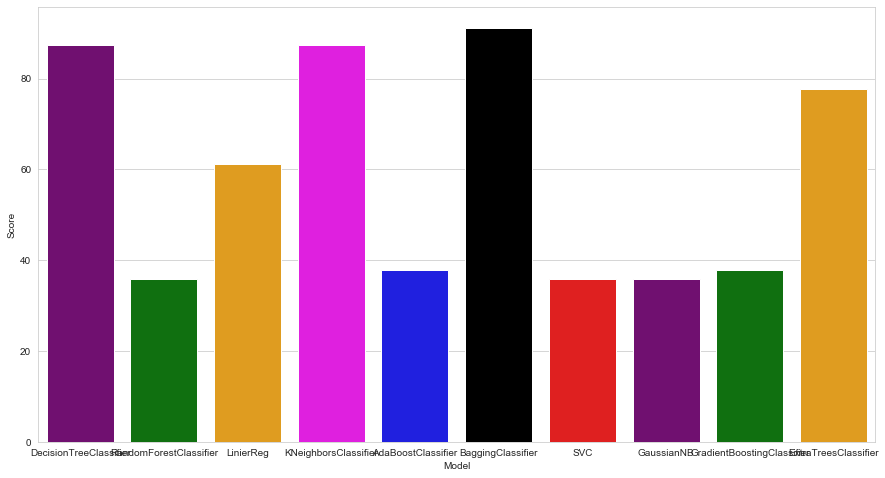

In [52]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [53]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [55]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [56]:
kmens=cluster.KMeans(n_clusters=3)

In [57]:
kmens=kmens.fit(df[['Diabetes','PremiumPrice']])

In [58]:
kmens.cluster_centers_

array([[4.79784367e-01, 3.06873315e+04],
       [4.18367347e-01, 2.34566327e+04],
       [3.22869955e-01, 1.53183857e+04]])

In [65]:
df['Diabetes_PremiumPrice']=kmens.labels_

In [60]:
k_range=range(1,15)
wcss=[]

In [63]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Diabetes','PremiumPrice']])
    wcss.append(km.inertia_)

In [64]:
wcss

[38454211193.51724,
 14372522422.32276,
 5051388068.8966465,
 1324728254.666325,
 910915573.5388739,
 633824057.4165041,
 415912094.3544712,
 154920321.64745182,
 107503044.82184666,
 61777440.88154319,
 36859848.85215931,
 29918182.1776495,
 23246154.835657492,
 17693652.07696142]

In [66]:
kmens1=cluster.KMeans(n_clusters=5)

In [69]:
kmens1=kmens.fit(df[['AnyTransplants','PremiumPrice']])

In [70]:
kmens1.cluster_centers_

array([[4.93273543e-02, 1.53183857e+04],
       [1.13207547e-01, 3.06873315e+04],
       [5.10204082e-03, 2.34566327e+04]])

In [71]:
df['AnyTransplants_PremiumPrice']=kmens1.labels_

In [72]:
k_range1=range(1,15)
wcss1=[]

In [85]:
for k in k_range1:
    km=KMeans(n_clusters=k)
    km.fit(df[['AnyTransplants','PremiumPrice']])
    wcss1.append(km.inertia_)

In [87]:
wcss1

[38454211005.2789,
 14315311344.7595,
 5051387881.849625,
 1324728058.3363018,
 910942707.0792681,
 633823862.5208714,
 368392190.1850579,
 154920117.6196984,
 107502842.63007802,
 61768009.881773464,
 36859647.50335401,
 29917975.736687344,
 23363430.282141887,
 17692827.651304808,
 38454211005.2789,
 14372522233.902605,
 5051387881.849625,
 1324728058.3363018,
 910942707.0792681,
 658102445.2788814,
 368392190.1850579,
 154920117.6196984,
 107502842.63007802,
 61768009.881773464,
 36859647.50335401,
 29917975.736687344,
 23245330.64272766,
 17692827.651304808,
 38454211005.2789,
 14315311344.7595,
 5051387881.849625,
 1324728058.3363018,
 910915377.7278938,
 633823862.5208714,
 404452267.11751544,
 154920117.6196984,
 107502842.63007802,
 61768009.881773464,
 36859647.50335401,
 29927204.739193905,
 23245330.64272766,
 17820156.2932256]

In [88]:
kmens2=KMeans(n_clusters=5)

In [89]:
kmens2=kmens2.fit(df[['HistoryOfCancerInFamily','PremiumPrice']])

In [90]:
kmens2.cluster_centers_

array([[1.77700348e-01, 2.89547038e+04],
       [1.25560538e-01, 1.53183857e+04],
       [1.80505415e-02, 2.27978339e+04],
       [1.29411765e-01, 3.64941176e+04],
       [1.84210526e-01, 2.50263158e+04]])

In [91]:
kmens2.cluster_centers_

array([[1.77700348e-01, 2.89547038e+04],
       [1.25560538e-01, 1.53183857e+04],
       [1.80505415e-02, 2.27978339e+04],
       [1.29411765e-01, 3.64941176e+04],
       [1.84210526e-01, 2.50263158e+04]])

In [92]:
df['HistoryOfCancerInFamily_PremiumPrice']=kmens2.labels_

In [95]:
k_range2=range(1,15)
wcss2=[]

In [96]:
for k in k_range2:
    km=KMeans(n_clusters=k)
    km.fit(df[['HistoryOfCancerInFamily','PremiumPrice']])
    wcss2.append(km.inertia_)

In [102]:
kmens4=KMeans(n_clusters=5)

In [103]:
kmens4=kmens4.fit(df[['NumberOfMajorSurgeries','PremiumPrice']])

In [104]:
kmens4.cluster_centers_

array([[3.56164384e-01, 2.26027397e+04],
       [1.28222997e+00, 2.89547038e+04],
       [3.65384615e-01, 1.50528846e+04],
       [5.29411765e-01, 3.64941176e+04],
       [5.70175439e-01, 2.50263158e+04]])

In [105]:
kmens4.cluster_centers_

array([[3.56164384e-01, 2.26027397e+04],
       [1.28222997e+00, 2.89547038e+04],
       [3.65384615e-01, 1.50528846e+04],
       [5.29411765e-01, 3.64941176e+04],
       [5.70175439e-01, 2.50263158e+04]])

In [106]:
df['NumberOfMajorSurgeries_PremiumPrice']=kmens4.labels_

In [109]:
k_range4=range(1,15)
wcss4=[]

In [110]:
for k in k_range4:
    km=KMeans(n_clusters=k)
    km.fit(df[['HistoryOfCancerInFamily','PremiumPrice']])
    wcss4.append(km.inertia_)

In [111]:
wcss4

[38454211055.6998,
 14315311393.42807,
 5051387932.752108,
 1324728119.5684083,
 923680007.8117647,
 645365252.9338677,
 368392239.18986225,
 154920180.3648622,
 107502905.02402231,
 65296674.15991461,
 36859698.739210166,
 29918032.060288597,
 23245387.094181925,
 17692884.2699275]

In [112]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Diabetes_PremiumPrice,AnyTransplants_PremiumPrice,HistoryOfCancerInFamily_PremiumPrice,NumberOfMajorSurgeries_PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000,1,2,4,4
1,60,1,0,0,0,180,73,0,0,0,29000,0,1,0,1
2,36,1,1,0,0,158,59,0,0,1,23000,1,2,2,0
3,52,1,1,0,1,183,93,0,0,2,28000,0,1,0,1
4,38,0,0,0,1,166,88,0,0,1,23000,1,2,2,0


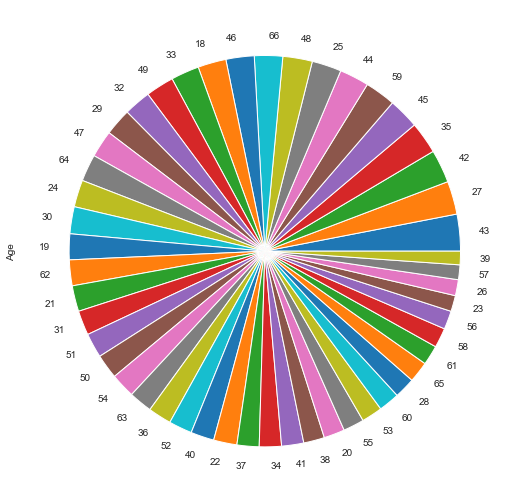

In [114]:
plt.figure(figsize = (15,9))
df.Age.value_counts().plot(kind='pie')

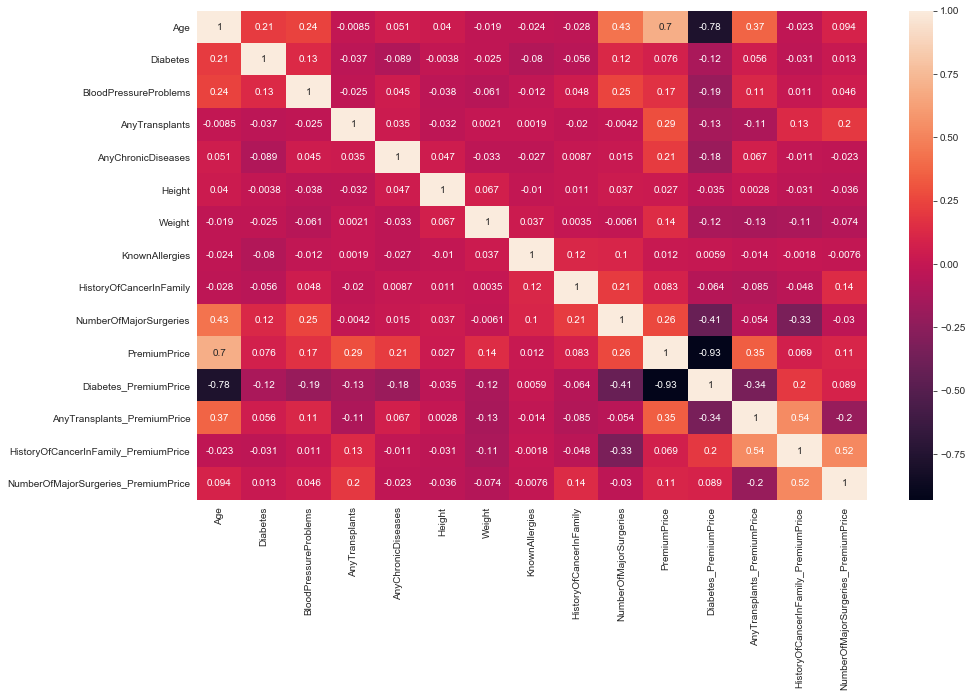

In [115]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

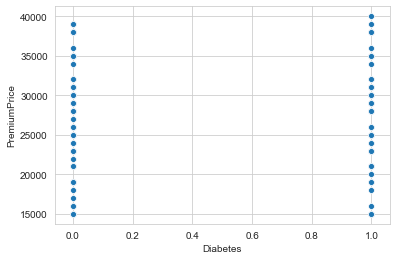

In [116]:
sns.scatterplot(x=df["Diabetes"], y=df["PremiumPrice"], 
data=df)

In [117]:
df.corr().abs()['PremiumPrice'].sort_values(ascending = False)

PremiumPrice                            1.000000
Diabetes_PremiumPrice                   0.931347
Age                                     0.697540
AnyTransplants_PremiumPrice             0.350967
AnyTransplants                          0.289056
NumberOfMajorSurgeries                  0.264250
AnyChronicDiseases                      0.208610
BloodPressureProblems                   0.167097
Weight                                  0.141507
NumberOfMajorSurgeries_PremiumPrice     0.109215
HistoryOfCancerInFamily                 0.083139
Diabetes                                0.076209
HistoryOfCancerInFamily_PremiumPrice    0.068663
Height                                  0.026910
KnownAllergies                          0.012103
Name: PremiumPrice, dtype: float64

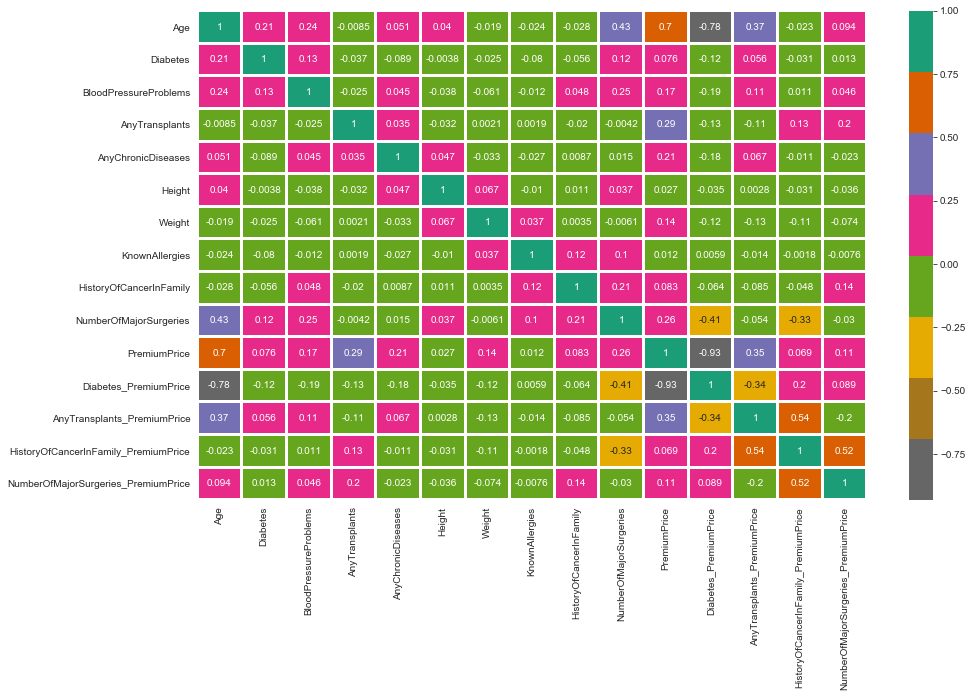

In [118]:
plt.figure(figsize=(15,9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

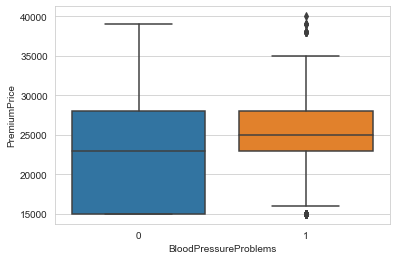

In [119]:
sns.boxplot(x=df["BloodPressureProblems"], y=df["PremiumPrice"], 
data=df)

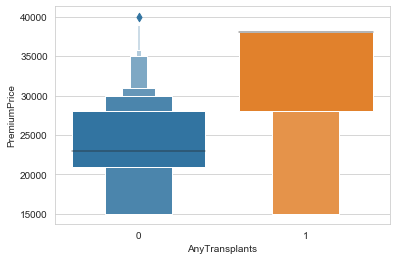

In [121]:
sns.boxenplot(x=df["AnyTransplants"], y=df["PremiumPrice"], 
data=df)

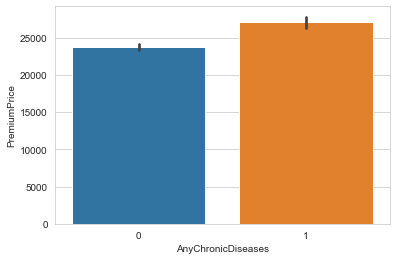

In [122]:
sns.barplot(x=df["AnyChronicDiseases"], y=df["PremiumPrice"], 
data=df)

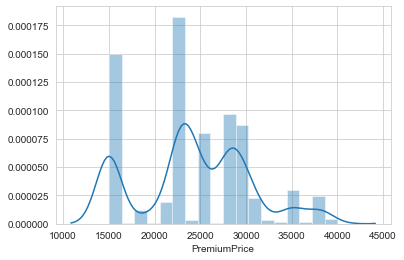

In [123]:
sns.distplot(df['PremiumPrice'])

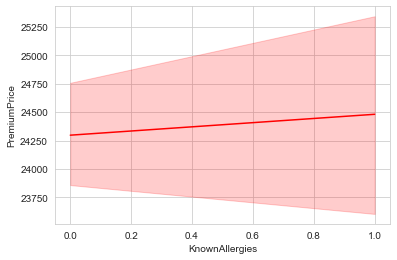

In [125]:
sns.lineplot(x=df["KnownAllergies"], y=df["PremiumPrice"],color='red', 
data=df)

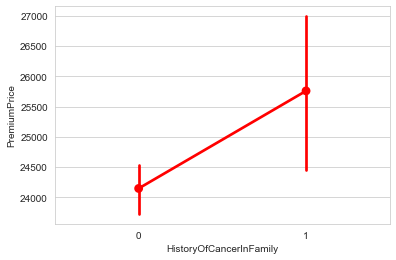

In [127]:
sns.pointplot(x=df["HistoryOfCancerInFamily"], y=df["PremiumPrice"], color='red',
data=df)

In [128]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Diabetes_PremiumPrice,AnyTransplants_PremiumPrice,HistoryOfCancerInFamily_PremiumPrice,NumberOfMajorSurgeries_PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000,1,2,4,4
1,60,1,0,0,0,180,73,0,0,0,29000,0,1,0,1
2,36,1,1,0,0,158,59,0,0,1,23000,1,2,2,0
3,52,1,1,0,1,183,93,0,0,2,28000,0,1,0,1
4,38,0,0,0,1,166,88,0,0,1,23000,1,2,2,0


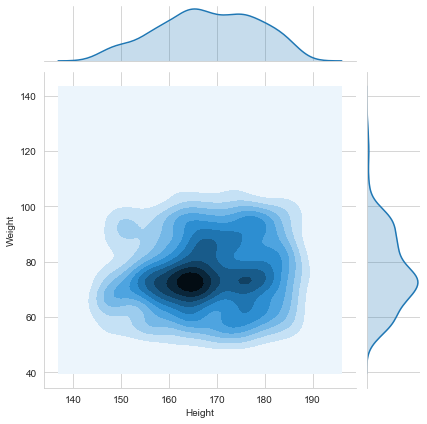

In [129]:
sns.jointplot(x=df["Height"], y=df["Weight"],kind='kde',
data=df)

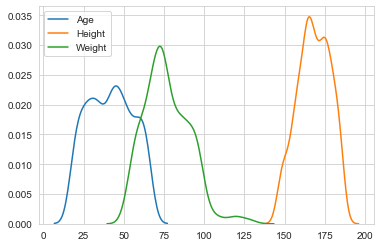

In [130]:
sns.kdeplot(df['Age'])
sns.kdeplot(df['Height'])
sns.kdeplot(df['Weight'])

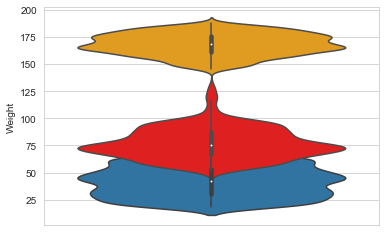

In [131]:
sns.violinplot(y="Age",data=df)
sns.violinplot(y="Height",data=df,color='orange')
sns.violinplot(y="Weight",data=df,color='red')

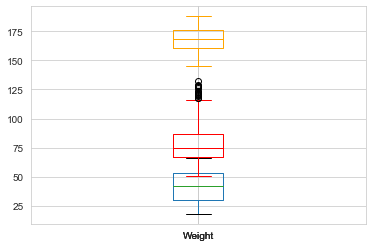

In [132]:
df.boxplot(column="Age")
df.boxplot(column="Height",color='orange')
df.boxplot(column="Weight",color='red')

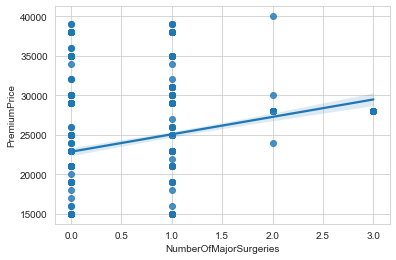

In [133]:
sns.regplot(x=df["NumberOfMajorSurgeries"], y=df["PremiumPrice"], 
data=df)

In [134]:
import sweetviz as sv

In [135]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [136]:
from IPython.display import IFrame

In [137]:
IFrame(src='Analyze.html',width=1000,height=600)

In [139]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'Diabetes_PremiumPrice', 'AnyTransplants_PremiumPrice',
       'HistoryOfCancerInFamily_PremiumPrice',
       'NumberOfMajorSurgeries_PremiumPrice'],
      dtype='object')

In [140]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [142]:
man=MinMaxScaler()
feat=['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'Diabetes_PremiumPrice', 'AnyTransplants_PremiumPrice',
       'HistoryOfCancerInFamily_PremiumPrice',
       'NumberOfMajorSurgeries_PremiumPrice']
df[feat]=man.fit_transform(df[feat])
df[feat]

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Diabetes_PremiumPrice,AnyTransplants_PremiumPrice,HistoryOfCancerInFamily_PremiumPrice,NumberOfMajorSurgeries_PremiumPrice
0,0.562500,0.0,0.0,0.0,0.0,0.232558,0.074074,0.0,0.0,0.000000,0.40,0.5,1.0,1.00,1.00
1,0.875000,1.0,0.0,0.0,0.0,0.813953,0.271605,0.0,0.0,0.000000,0.56,0.0,0.5,0.00,0.25
2,0.375000,1.0,1.0,0.0,0.0,0.302326,0.098765,0.0,0.0,0.333333,0.32,0.5,1.0,0.50,0.00
3,0.708333,1.0,1.0,0.0,1.0,0.883721,0.518519,0.0,0.0,0.666667,0.52,0.0,0.5,0.00,0.25
4,0.416667,0.0,0.0,0.0,1.0,0.488372,0.456790,0.0,0.0,0.333333,0.32,0.5,1.0,0.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0.000000,0.0,0.0,0.0,0.0,0.558140,0.197531,0.0,0.0,0.000000,0.00,1.0,0.0,0.25,0.50
982,0.958333,1.0,1.0,0.0,0.0,0.186047,0.234568,0.0,0.0,1.000000,0.52,0.0,0.5,0.00,0.25
983,0.791667,0.0,1.0,0.0,0.0,0.232558,0.246914,0.0,0.0,0.333333,0.56,0.0,0.5,0.00,0.25
984,0.604167,1.0,1.0,0.0,0.0,0.302326,0.271605,1.0,0.0,0.333333,0.96,0.0,0.5,0.75,0.75


In [143]:
std=StandardScaler()
feat=['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'Diabetes_PremiumPrice', 'AnyTransplants_PremiumPrice',
       'HistoryOfCancerInFamily_PremiumPrice',
       'NumberOfMajorSurgeries_PremiumPrice']
df[feat]=std.fit_transform(df[feat])
df[feat]

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,Diabetes_PremiumPrice,AnyTransplants_PremiumPrice,HistoryOfCancerInFamily_PremiumPrice,NumberOfMajorSurgeries_PremiumPrice
0,0.233197,-0.850750,-0.938978,-0.243056,-0.469358,-1.306105,-1.399250,-0.523356,-0.365148,-0.891187,0.106210,0.197109,1.074787,1.911428,1.965620
1,1.307981,1.175433,-0.938978,-0.243056,-0.469358,1.170852,-0.277062,-0.523356,-0.365148,-0.891187,0.746721,-1.116064,-0.222324,-1.158064,-0.332524
2,-0.411674,1.175433,1.064988,-0.243056,-0.469358,-1.008870,-1.258976,-0.523356,-0.365148,0.444239,-0.214045,0.197109,1.074787,0.376682,-1.098572
3,0.734763,1.175433,1.064988,-0.243056,2.130569,1.468086,1.125674,-0.523356,-0.365148,1.779665,0.586594,-1.116064,-0.222324,-1.158064,-0.332524
4,-0.268369,-0.850750,-0.938978,-0.243056,2.130569,-0.216244,0.774990,-0.523356,-0.365148,0.444239,-0.214045,0.197109,1.074787,0.376682,-1.098572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,-1.701415,-0.850750,-0.938978,-0.243056,-0.469358,0.080991,-0.697882,-0.523356,-0.365148,-0.891187,-1.495067,1.510283,-1.519436,-0.390691,0.433524
982,1.594590,1.175433,1.064988,-0.243056,-0.469358,-1.504261,-0.487472,-0.523356,-0.365148,3.115090,0.586594,-1.116064,-0.222324,-1.158064,-0.332524
983,1.021372,-0.850750,1.064988,-0.243056,-0.469358,-1.306105,-0.417335,-0.523356,-0.365148,0.444239,0.746721,-1.116064,-0.222324,-1.158064,-0.332524
984,0.376502,1.175433,1.064988,-0.243056,-0.469358,-1.008870,-0.277062,1.910744,-0.365148,0.444239,2.347998,-1.116064,-0.222324,1.144055,1.199572
